In [1]:
## Import libraries ##
import numpy as np
import math
from scipy import stats
from scipy.stats import multivariate_normal
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.style.use('default')
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns
import pandas as pd

**Exercise:** AME 565 Lab - Maximum Likelihood and Bayesian update

1) Generate $N$ sampes from a normal distribution with mean $1$ and standard deviation $2$. Using maximum likelihood estimation (MLE), find an estimate of the mean and standard deviation. Use an array of value estimates. Start with $N=5$ and increase gradually

2) Consider an exponential distribution of parameter $\lambda = 2$ that we want to estimate based on $N$ observations. First estimate $\lambda$ through MLE. Then use Bayesian update to find a distribution between $1$ and $3$ with standard deviation of $0.5$. In each case, find the maximum of the posterior using an array of $\lambda$ values.

3) Redo 1) and 2) but optimize the MLE

## 1.

In [2]:
# Given:
N1 = 5
X1 = np.random.normal(1, 2, N1)

We take $N$ samples $X_i\sim N(1,2^2)$. The pdf of $X_i$ is:
$$
f(x_i) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)
$$
We want to estimate the mean $\mu_0$ and variance $\sigma_0^2$ using the MLE.
<br>
The likelihood of these $N$ samples is
$$
L(\mu,\sigma^2\vert x_1,\ldots,x_N) = \prod_{i=1}^N f(x_i) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x_i-\mu)^2}{2\sigma^2}\right)
$$
$$
= (2\pi\sigma^2)^{-N/2}\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^N(x_i-\mu)^2\right)
$$
Taking the log of $L$ gives us the log-likelihood:
$$
l(\mu,\sigma^2\vert x_1,\ldots,x_N) = -\frac{N}{2}\ln(2\pi) - \frac{N}{2}\ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^N(x_i-\mu)^2
$$
We find the maximum likelihood estimators by solving the maximization problem $\max_{\mu,\sigma^2} l(\mu,\sigma^2,x_1,\ldots,x_N)$. Taking the partial derivative of the log-likelihood with respect to each parameter, setting each to $0$, and solving returns
$$
\hat{\mu_o} = \frac{1}{N}\sum_{i=1}^N x_i
$$
$$
\hat{\sigma_o^2} = \frac{1}{N}\sum_{i=1}^N(x_i - \hat{\mu_o})^2
$$
We use the last two results to estimate the mean and standard deviation of the given sample:

In [3]:
#N=5
mu_o = (1/N1)*np.sum(X1)
sigma_o = np.sqrt( (1/N1)*np.sum((X1-mu_o)**2) )
print(mu_o, sigma_o)

0.6633523585278145 1.9167914234652275


In [4]:
#N=5,...,20
for N1 in range(5,21):
    X1 = np.random.normal(1, 2, N1)
    mu_o = (1/N1)*np.sum(X1)
    sigma_o = np.sqrt( (1/N1)*np.sum((X1-mu_o)**2) )
    print("N=",N1,"mu_0=",mu_o,"sigma_o=",sigma_o)

N= 5 mu_0= 1.4687105689448448 sigma_o= 0.9028299352811595
N= 6 mu_0= 1.8022531040164127 sigma_o= 1.4705184864555094
N= 7 mu_0= -0.18609682775382363 sigma_o= 2.1135722100207515
N= 8 mu_0= 1.7520571932608378 sigma_o= 1.9727544934416206
N= 9 mu_0= 1.143041630350822 sigma_o= 1.8593490725692945
N= 10 mu_0= 1.0002989396986444 sigma_o= 2.9886725000246304
N= 11 mu_0= 1.2319206741595168 sigma_o= 1.9174726099035995
N= 12 mu_0= 1.1894621378459322 sigma_o= 1.4401551033193294
N= 13 mu_0= 0.8048531988586776 sigma_o= 1.998197726125142
N= 14 mu_0= 1.3837362580196475 sigma_o= 2.2899086570589393
N= 15 mu_0= 1.3415666002419555 sigma_o= 2.137842270885333
N= 16 mu_0= 0.4480636991480091 sigma_o= 1.512179072353189
N= 17 mu_0= 1.4125940858875596 sigma_o= 1.8278113144377328
N= 18 mu_0= 0.48716245039234546 sigma_o= 1.7091525337861493
N= 19 mu_0= 1.533621084821527 sigma_o= 1.8697043194304632
N= 20 mu_0= 0.9729523923173764 sigma_o= 1.6689513699370526


In [5]:
N1 = 10000
X1 = np.random.normal(1, 2, N1)
mu_o = (1/N1)*np.sum(X1)
sigma_o = np.sqrt( (1/N1)*np.sum((X1-mu_o)**2) )
print("N=",N1,"mu_0=",mu_o,"sigma_o=",sigma_o)

N= 10000 mu_0= 0.9941531564611186 sigma_o= 1.9932701777172541


## 2.

In [6]:
#Given:
N1 = 100
rate = 2 #lambda = 2
X1 = np.random.exponential(1/rate, N1)

We take $N$ samples of $X_i\sim \text{Exp}(\lambda = 2)$. We want to estimate the rate parameter $\lambda_0$. The pdf of $X_i$ is
$$
f(x_i) = \lambda\exp(-\lambda x_i), x_i\in [0,\infty)
$$
The the likelihood is
$$
L(\lambda\vert x_1,\ldots,x_N) = \prod_{i=1}^N f(x_i) = \prod_{i=1}^N \lambda\exp(-\lambda x_i)
$$
$$
= \lambda^N\exp\left(-\lambda\sum_{i=1}^N x_i\right)
$$
Then the log-likelihood is
$$
l(\lambda\vert x_1,\ldots,x_N) = n\ln(\lambda) - \lambda\sum_{i=1}^N x_i
$$
Taking the partial derivative with respect to $\lambda$, setting it to $0$, and solving yields
$$
\hat{\lambda_o} = \frac{N}{\sum_{i=1}^N x_i}
$$
We use this result to estimate $\lambda_0$:

In [7]:
lambda_o = N1/np.sum(X1)
lambda_o

2.207711274361658

We use a Bayesian update to find a distribution of $\lambda$ (posterior) via (a) uniform prior and (b) truncated normal with std of $0.5$.
<br>
a) The likelihood is a function of $\lambda$ with $X$ fixed was given above as
$$
p(X\vert \lambda) = \lambda^N\exp\left(-\lambda\sum_{i=1}^N x_i\right)
$$
The prior is $p(\lambda) = \frac{1}{2}, \lambda\in [1,3]$. 
<br>
Then the posterior probability is the probability of $\lambda$ given the $X$:
$$
p(\lambda\vert X) = \frac{p(X\vert\lambda)p(\lambda)}{\int p(X\vert\lambda)p(\lambda)d\lambda}
$$
$$
= \frac{\lambda^N\exp\left(-\lambda\sum_{i=1}^N x_i\right)}{\int_1^3 \lambda^N\exp\left(-\lambda\sum_{i=1}^N x_i\right)d\lambda}
$$

In [8]:
#a)
import scipy.integrate as integrate

def integrand1(lam): #denominator & numerator
    return lam**N1 * np.exp(-lam*np.sum(X1))
denom1 = integrate.quad(integrand1, 1, 3)

def post1(lam): #this is the posterior
    return integrand1(lam)/denom1[0]

In [9]:
#double checking that our posterior integrates to 1
integrate.quad(post1,1,3)[0]

0.9999999999669537

In [10]:
obj_list = []
lam_list = []
for lam in np.linspace(1,3,100):
    obj_list.append(post1(lam))
    lam_list.append(lam)

lam_list[np.argmax(obj_list)]

2.212121212121212

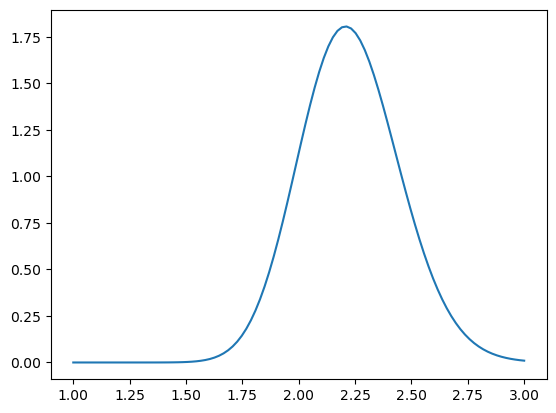

In [11]:
plt.plot(lam_list,obj_list)

b) The likelihood is a function of $\lambda$ with $X$ fixed was given above as
$$
p(X\vert \lambda) = \lambda^N\exp\left(-\lambda\sum_{i=1}^N x_i\right)
$$
The prior is $p(\lambda) = \text{Norm}(\lambda,0.5), \lambda\in [1,3]$. 
<br>
Then the posterior probability is the probability of $\lambda$ given the $X$:
$$
p(\lambda\vert X) = \frac{p(X\vert\lambda)p(\lambda)}{\int p(X\vert\lambda)p(\lambda)d\lambda}
$$
$$
= \frac{\lambda^N\exp\left(-\lambda\sum_{i=1}^N x_i\right)\text{Norm}(\lambda,0.5)}{\int_1^3 \lambda^N\exp\left(-\lambda\sum_{i=1}^N x_i\right)\text{Norm}(\lambda,0.5)d\lambda}
$$

In [12]:
#b)
def integrand2(lam): #denominator & numerator
    return lam**N1 * np.exp(-lam*np.sum(X1)) * stats.norm.pdf(lam,3,0.5)
denom2 = integrate.quad(integrand2, 1, 5) #denominator

def post2(lam): #this is the posterior
    return integrand2(lam)/denom2[0]

In [13]:
#double checking that our posterior integrates to 1
integrate.quad(post2,1,3)[0]

0.9977845693902645

In [14]:
obj_list = []
lam_list = []
for lam in np.linspace(1,3,1000):
    obj_list.append(post2(lam))
    lam_list.append(lam)

lam_list[np.argmax(obj_list)]

2.343343343343343

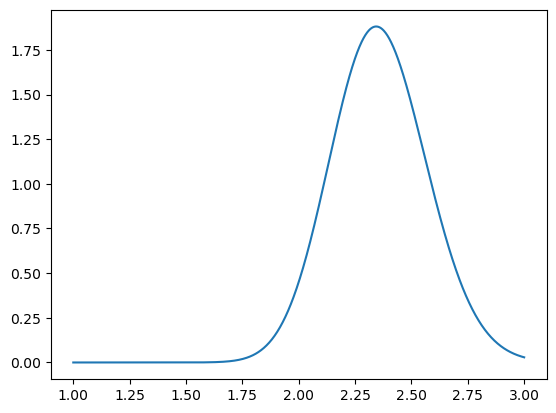

In [15]:
plt.plot(lam_list,obj_list)

## 3.

In [16]:
#2)
#lets find the maximum of the posterior:
def obj_fun1(lam):
    return -1*post1(lam)
#lets find the maximum of the posterior:
def obj_fun2(lam):
    return -1*post2(lam)
min_a = minimize(obj_fun1, 1.1, method = "Nelder-Mead")
print(min_a)
min_b = minimize(obj_fun2, 1.1, method = "Nelder-Mead")
print(min_b)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -1.8069158264323355
             x: [ 2.208e+00]
           nit: 18
          nfev: 36
 final_simplex: (array([[ 2.208e+00],
                       [ 2.208e+00]]), array([-1.807e+00, -1.807e+00]))
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -1.880839903493829
             x: [ 2.344e+00]
           nit: 18
          nfev: 36
 final_simplex: (array([[ 2.344e+00],
                       [ 2.344e+00]]), array([-1.881e+00, -1.881e+00]))


## MCMC Example
Generate $N(0,1)$ using the random walk Metropolis algorithm based on proposal distribution $Q(\theta_i'\vert \theta_{i-1}) \sim \text{Unif}(\theta_{i-1}-a, \theta_{i-1}+a)$.

In [2]:
#0) Initiation
bound = 2 #bounds of theta
a = 1
N = 5000
theta = np.zeros(N)
theta[0] = 0  # first value of theta in the Markov chain is 0.

for i in range(1, N):
    #1) Propose new position theta[i-1] -> theta[i]' by sampling from proposal distro
    theta_prop = np.random.uniform(theta[i-1]-a, theta[i-1]+a) #theta[i]'

    #2) Compute transition probability
    P_prop = stats.norm.pdf(theta_prop, 0, 1) #~P(theta_i')
    P_prev = stats.norm.pdf(theta[i-1], 0, 1)  #~P(theta_{i-1})
    
    alpha = min(P_prop/P_prev, 1)  # Acceptance ratio
    
    #3) Generate a random number u_i from [0,1]
    u = np.random.uniform(0,1) #u_i
    
    #4)
    if (u <= alpha and -bound<= theta_prop <= bound):
        theta[i] = theta_prop  # Accept y as next state
    else:
        theta[i] = theta[i-1]  # Stay at previous state of Markov chain

n = int(0.95*N)
C = theta[-n:]
C

array([-1.27100124, -1.96285219, -1.96285219, ..., -0.46407495,
        0.14729387,  1.09100709])

Text(0, 0.5, 'Theta')

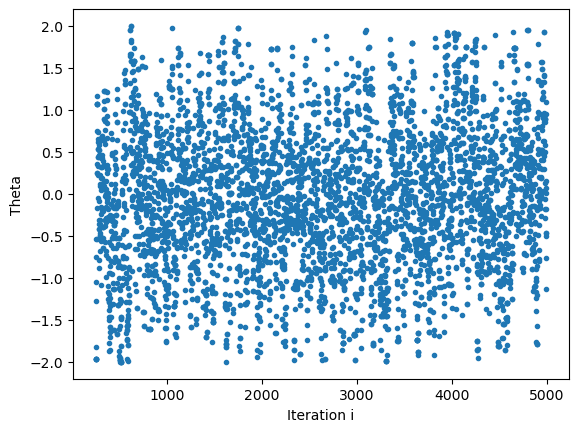

In [3]:
plt.plot(range(N-n, N),C,'.')
plt.xlabel('Iteration i')
plt.ylabel('Theta')

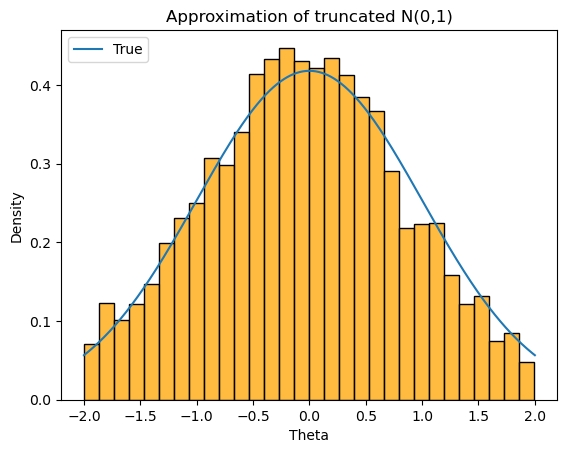

In [4]:
# Plot of true density function
x = np.linspace(-bound,bound,1000)
plt.plot(x, stats.norm.pdf(x, 0, 1)/(stats.norm.cdf(bound) - stats.norm.cdf(-bound)), label="True")

# Plot of MCMC approximation
sns.histplot(C, kde=False, bins = 30, color="orange", stat="density")

plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Approximation of truncated N(0,1)')
plt.legend(loc='upper left')
plt.show()

In [5]:
#y_hist is the density (pdf) of the posterior
nbins = 30
y_hist, x_hist = np.histogram(C, bins = nbins, density=True)
density = ((bound-(-bound))/nbins)*y_hist
print(density.shape)

#check that the posterior iyntegrates to 1:
np.sum(density,axis=0)

(30,)


1.0010672753012624